# SemEval 2023 Additional Plots

## Classification Report per Class

In [12]:
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def read_file(file_path):
    df = pd.read_csv(file_path, sep='\t', header=None, names=['id', 'labels'])

    # make both cols as string
    df['id'] = df['id'].astype(str)
    df['labels'] = df['labels'].astype(str)

    return df

def process_labels(labels):
    return labels.apply(lambda x: x.split(','))

def create_multilabel_matrix(all_labels, label_lists):
    return np.array([[1 if label in label_list else 0 for label in all_labels] for label_list in label_lists])


In [20]:
def plot_prediction_file(pred_file, gold_file, env):
    # Read files
    gold_df = read_file(gold_file)
    pred_df = read_file(pred_file)

    # Process labels
    gold_labels = process_labels(gold_df['labels'])
    pred_labels = process_labels(pred_df['labels'])

    # Use the provided col_names to set the labels
    col_names = "Capacity_and_resources;Crime_and_punishment;Cultural_identity;Economic;External_regulation_and_reputation;Fairness_and_equality;Health_and_safety;Legality_Constitutionality_and_jurisprudence;Morality;Policy_prescription_and_evaluation;Political;Public_opinion;Quality_of_life;Security_and_defense"
    all_labels = col_names.split(';')

    # Create multi-label matrices
    y_true = create_multilabel_matrix(all_labels, gold_labels)
    y_pred = create_multilabel_matrix(all_labels, pred_labels)

    # Generate classification report as a dictionary
    report_dict = classification_report(y_true, y_pred, target_names=all_labels, zero_division=0, output_dict=True)

    # Print the report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=all_labels, zero_division=0))

    # Extract F1 scores
    values = [report_dict[label]['f1-score'] for label in all_labels]

    # Define the frame map
    frame_map = {
        "Capacity_and_resources": "Capacity and resources",
        "Crime_and_punishment": "Crime and punishment",
        "Cultural_identity": "Cultural identity",
        "Economic": "Economic",
        "External_regulation_and_reputation": "External regulation and reputation",
        "Fairness_and_equality": "Fairness and equality",
        "Health_and_safety": "Health and safety",
        "Legality_Constitutionality_and_jurisprudence": "Legality, constitutionality, and jurisprudence",
        "Morality": "Morality",
        "Policy_prescription_and_evaluation": "Policy prescription and evaluation",
        "Political": "Political",
        "Public_opinion": "Public opinion",
        "Quality_of_life": "Quality of life",
        "Security_and_defense": "Security and defense",
    }

    # Apply the frame_map to get better names
    labels = [frame_map[label] for label in all_labels]

    # Set the style and color palette
    colors = sns.color_palette("husl", n_colors=len(labels))

    # Create the plot
    plt.figure(figsize=(14, 8))
    bars = plt.bar(labels, values, color=colors)

    # Customize the plot
    plt.title(f'F1 per Class for {env} Dataset', fontsize=16)
    plt.ylabel('F1 Score', fontsize=14)
    plt.ylim(0, 1.0)
    plt.xticks(rotation=45, ha='right', fontsize=14)

    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=12)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

### Plot for Test File

Classification Report:
                                              precision    recall  f1-score   support

                      Capacity_and_resources       0.33      0.50      0.40         2
                        Crime_and_punishment       0.30      0.55      0.39        11
                           Cultural_identity       0.00      0.00      0.00         0
                                    Economic       0.33      0.50      0.40         2
          External_regulation_and_reputation       0.67      1.00      0.80        18
                       Fairness_and_equality       0.12      0.67      0.21         3
                           Health_and_safety       0.10      1.00      0.18         1
Legality_Constitutionality_and_jurisprudence       0.44      0.89      0.59        19
                                    Morality       0.23      1.00      0.38         6
          Policy_prescription_and_evaluation       0.00      0.00      0.00         4
                              

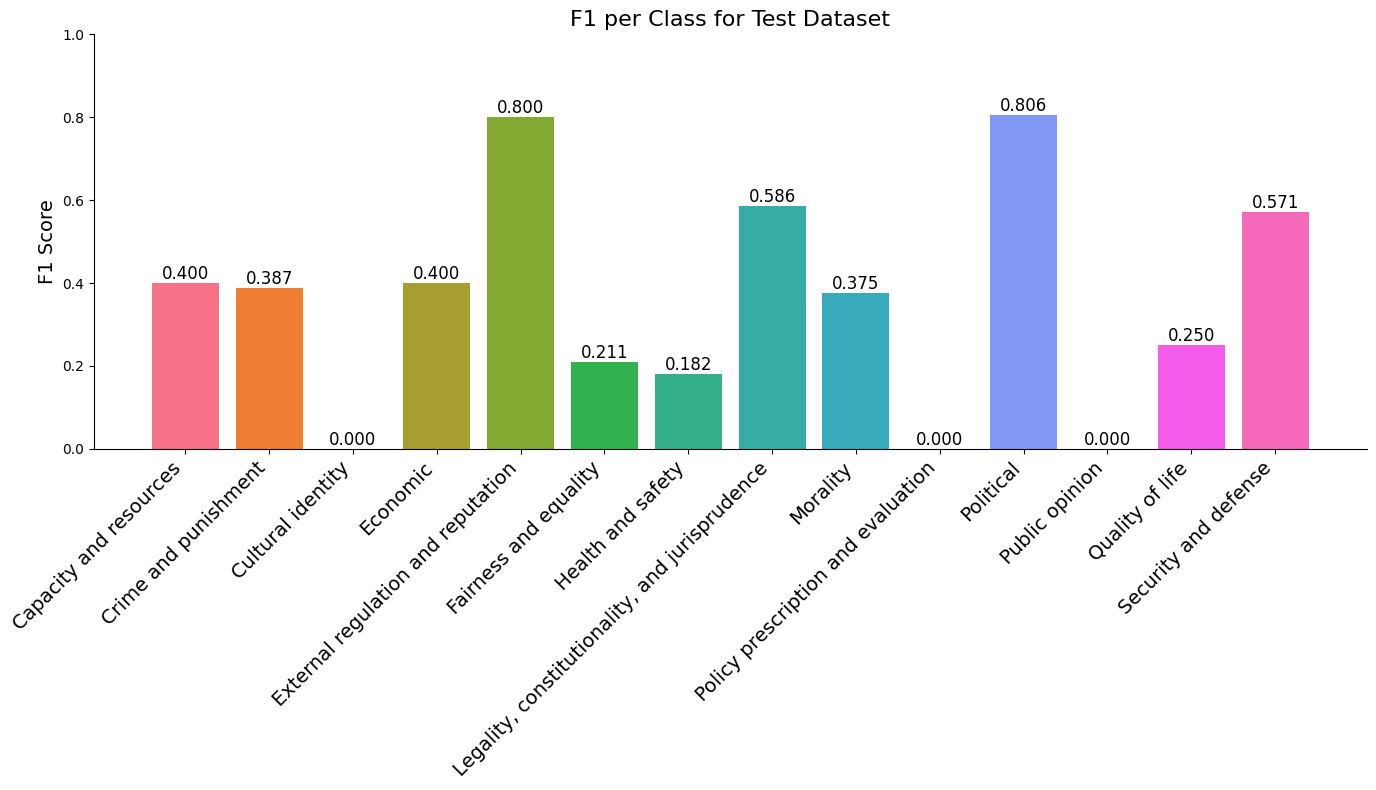

In [21]:
plot_prediction_file('../../data/semeval/scorers/preds_eval_burning_helmet_8544_model-v0.txt',  '../../data/semeval/scorers/gold_label_task2.txt', env="Test")

### Plot for Dev File

Classification Report:
                                              precision    recall  f1-score   support

                      Capacity_and_resources       0.00      0.00      0.00         8
                        Crime_and_punishment       0.78      0.80      0.79        35
                           Cultural_identity       0.00      0.00      0.00         2
                                    Economic       0.60      0.19      0.29        16
          External_regulation_and_reputation       0.95      0.79      0.87        77
                       Fairness_and_equality       0.15      0.50      0.24         8
                           Health_and_safety       0.00      0.00      0.00         3
Legality_Constitutionality_and_jurisprudence       0.79      0.97      0.87        62
                                    Morality       0.28      0.50      0.36        16
          Policy_prescription_and_evaluation       0.00      0.00      0.00        61
                              

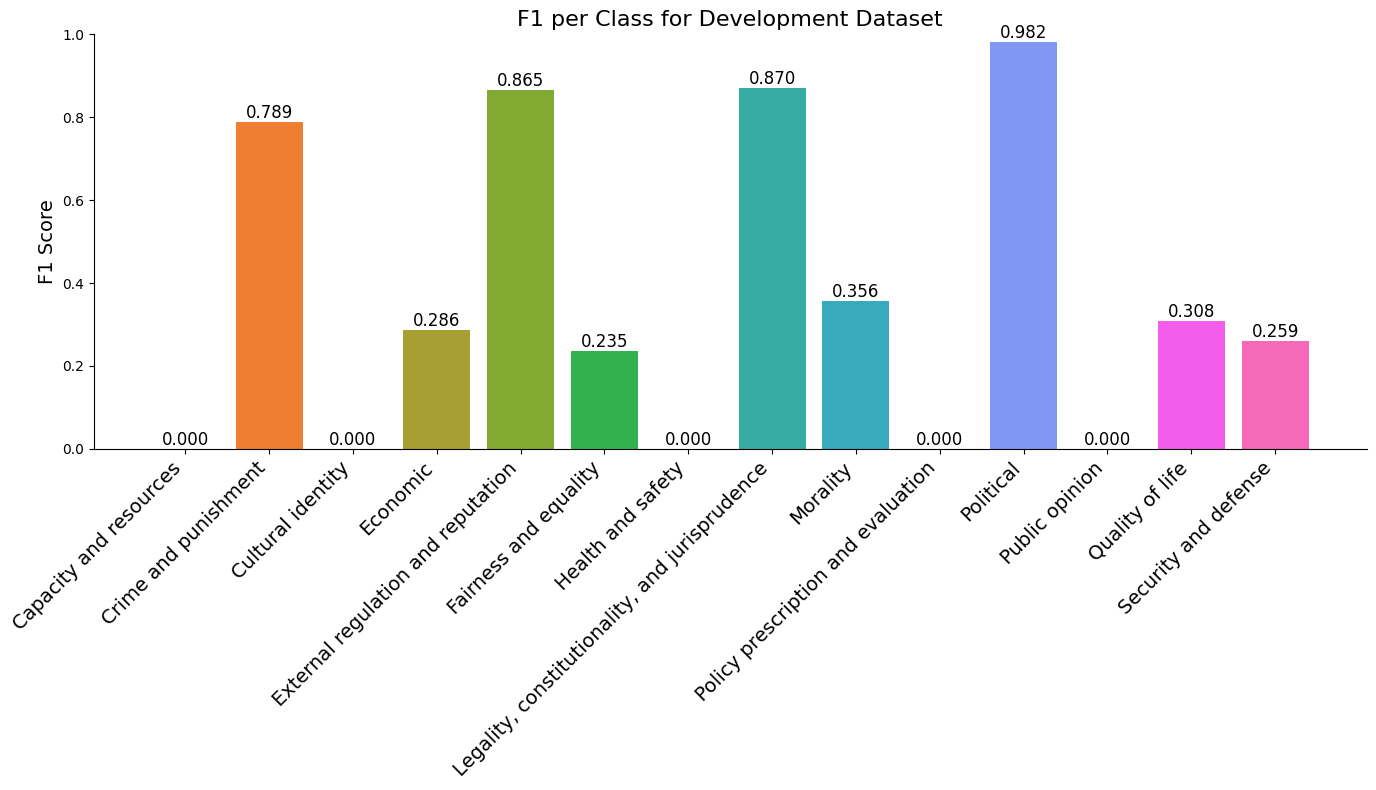

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def save_labels_to_file(labels, filename):
    np.save(filename, labels)

def plot_prediction_file(pred_file, gold_file, env):
    # Read files
    y_pred = np.load(pred_file)
    y_true = np.load(gold_file)

    # Use the provided col_names to set the labels
    col_names = "Capacity_and_resources;Crime_and_punishment;Cultural_identity;Economic;External_regulation_and_reputation;Fairness_and_equality;Health_and_safety;Legality_Constitutionality_and_jurisprudence;Morality;Policy_prescription_and_evaluation;Political;Public_opinion;Quality_of_life;Security_and_defense"
    all_labels = col_names.split(';')

    # Generate classification report as a dictionary
    report_dict = classification_report(y_true, y_pred, target_names=all_labels, zero_division=0, output_dict=True)

    # Print the report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=all_labels, zero_division=0))

    # Extract F1 scores
    values = [report_dict[label]['f1-score'] for label in all_labels]

    # Define the frame map
    frame_map = {
        "Capacity_and_resources": "Capacity and resources",
        "Crime_and_punishment": "Crime and punishment",
        "Cultural_identity": "Cultural identity",
        "Economic": "Economic",
        "External_regulation_and_reputation": "External regulation and reputation",
        "Fairness_and_equality": "Fairness and equality",
        "Health_and_safety": "Health and safety",
        "Legality_Constitutionality_and_jurisprudence": "Legality, constitutionality, and jurisprudence",
        "Morality": "Morality",
        "Policy_prescription_and_evaluation": "Policy prescription and evaluation",
        "Political": "Political",
        "Public_opinion": "Public opinion",
        "Quality_of_life": "Quality of life",
        "Security_and_defense": "Security and defense",
    }

    # Apply the frame_map to get better names
    labels = [frame_map[label] for label in all_labels]

    # Set the style and color palette
    colors = sns.color_palette("husl", n_colors=len(labels))

    # Create the plot
    plt.figure(figsize=(14, 8))
    bars = plt.bar(labels, values, color=colors)

    # Customize the plot
    plt.title(f'F1 per Class for {env} Dataset', fontsize=16)
    plt.ylabel('F1 Score', fontsize=14)
    plt.ylim(0, 1.0)
    plt.xticks(rotation=45, ha='right', fontsize=14)

    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=12)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_prediction_file('../../data/explainability/semeval/predicted_labels.npy', '../../data/explainability/semeval/true_labels.npy', 'Development')

In [9]:
len(np.load("../../data/explainability/semeval/predicted_labels.npy"))

83

In [10]:
len(np.load("../../data/explainability/semeval/true_labels.npy"))

83